In [1]:
import sys; sys.path.extend(['../../', '../'])
from jpdr.datasets import GroZi3kTonioni as GroZi3k
from torchvision.transforms.functional import to_pil_image
from data import get_dataloaders
from training.training_steps.task_specific import create_recog_batch
from training.training_steps.crop_batch import create_crop_batch
from PIL import Image, ImageDraw

In [2]:
ds_query = GroZi3k('../../data/GroceryProducts_Tonioni/', subset='val_query')

In [3]:
dl_train_det, dl_train_recog, dl_val = get_dataloaders('tonioni', normalize=False, shuffle_train=False,
                                                       train_crop_how='center')

dl_train_recog = iter(dl_train_recog)

for _ in range(1):
    x, targets = next(dl_train_recog)

In [4]:
ts_crops, _ = create_recog_batch(x, targets)
cb_crops, _, cb_boxes = create_crop_batch(
    x, targets, crop_box_size=300,
    crop_box_iou_thresh=1.0,
    crop_box_max_rand_shift=0,
    crop_box_max_out_pct=1.0,
    min_tgt_area_pct=0.0,
    return_crop_boxes=True,
)

In [5]:
ts_ims = [to_pil_image(t) for t in ts_crops]
print(len(ts_ims))
cb_ims = [to_pil_image(t) for t in cb_crops]
print(len(cb_ims))

16
16


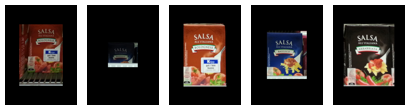

In [6]:
from image_tools import equal_height_grid

equal_height_grid(
    ts_ims[:5], row_height=100, ims_per_row=5
)

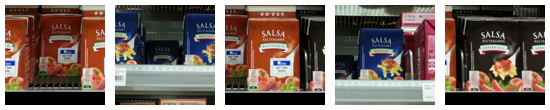

In [7]:
equal_height_grid(
    cb_ims[:5], row_height=100, ims_per_row=5
)